<a href="https://colab.research.google.com/github/novoa123/Proyecto_Machine_Learning/blob/main/Semana_1_Exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 1: Exploración del problema y del dataset

## 1. Cargar y visualizar señales ECG

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

sns.set_style("whitegrid")

In [7]:
df = pd.read_csv('ecg_rr_features_curado.csv')

df.head()

,mean_rr,std_rr,skew_rr,kurt_rr,label
0,849.671415,37.965868,0.404165,3.097078,Normal
1,786.173570,87.045564,0.462868,3.968645,AFib
2,864.768854,49.730056,0.278733,2.297947,Normal
3,952.302986,28.845781,0.260759,2.672338,AFib
4,776.584663,66.450898,0.662505,2.607892,AFib


In [13]:
#Tipos de datos y dimensiones

print ('Dimensiones:', df.shape)
print ('Tipos de datos: \n',df.dtypes)

Dimensiones: (30, 5)
Tipos de datos: 
 mean_rr    float64
std_rr     float64
skew_rr    float64
kurt_rr    float64
label       object
dtype: object


In [18]:
print ('Valores nulos: \n',df.isnull().sum(), '\n\n')

print ('Valores únicos: \n',df.nunique(), '\n\n')

print ('Valores estadísticos: \n',df.describe())

Valores nulos: 
 mean_rr    0
std_rr     0
skew_rr    0
kurt_rr    0
label      0
dtype: int64 


Valores únicos: 
 mean_rr    30
std_rr     30
skew_rr    30
kurt_rr    30
label       2
dtype: int64 


Valores estadísticos: 
           mean_rr     std_rr    skew_rr    kurt_rr
count   30.000000  30.000000  30.000000  30.000000
mean   781.185310  47.576751   0.502577   2.979748
std     90.000643  18.622044   0.198397   0.908822
min    608.671976  10.806598  -0.023949   1.081229
25%    740.894910  35.817727   0.397172   2.620240
50%    776.585483  48.708545   0.505122   2.969387
75%    836.033535  60.893236   0.647542   3.287354
max    957.921282  87.045564   0.812929   5.463242


Distribucion de clases 

label
Normal    18
AFib      12
Name: count, dtype: int64 



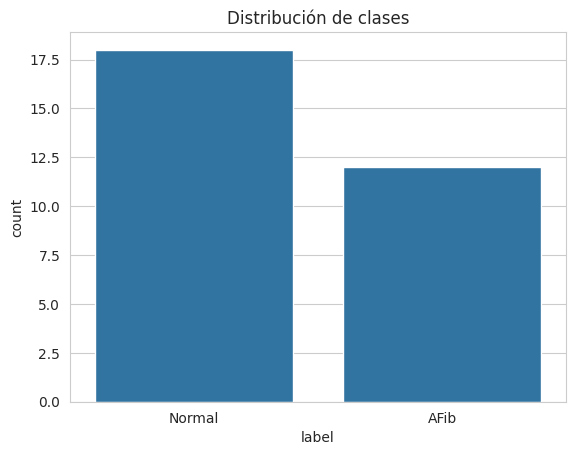

In [22]:
print ('Distribucion de clases \n')

print(df['label'].value_counts(), '\n')

sns.countplot(x = 'label', data = df)

plt.title('Distribución de clases')
plt.show()

### Recomendación: usar matplotlib, wfdb, scipy.io

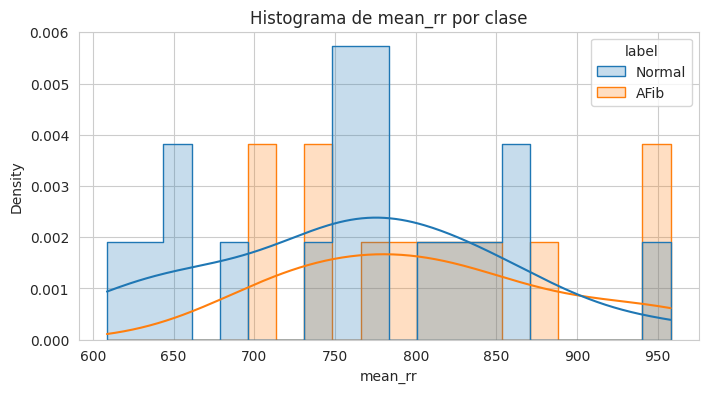

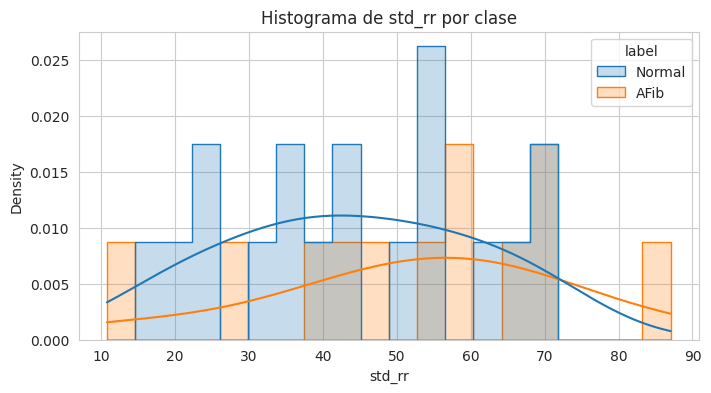

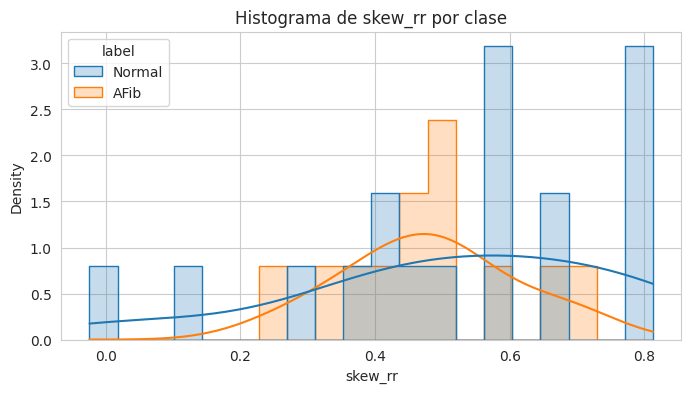

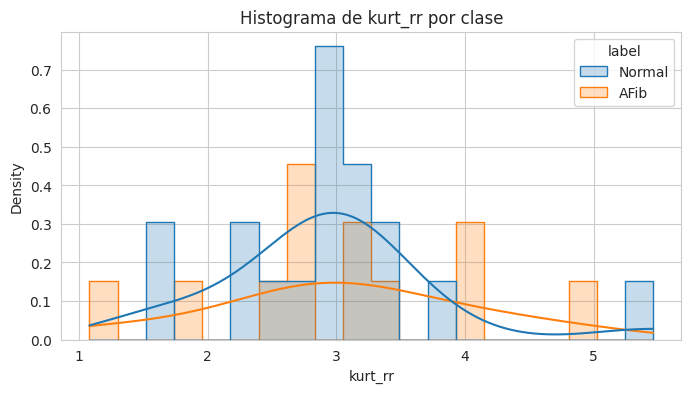

In [28]:
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']


#Histogramas
for col in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='label', bins=20, kde=True, stat='density', element='step')
    plt.title(f'Histograma de {col} por clase')
    plt.show()

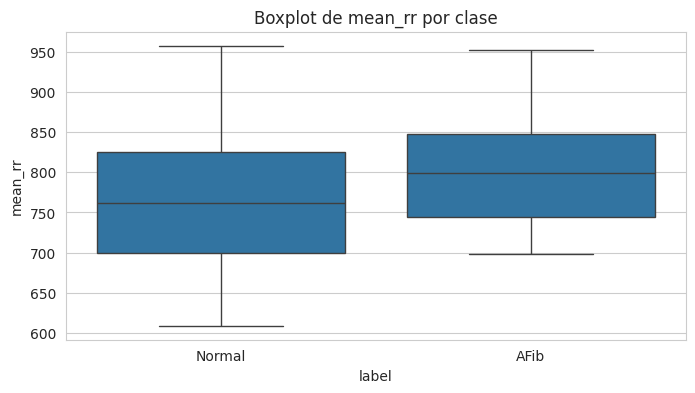

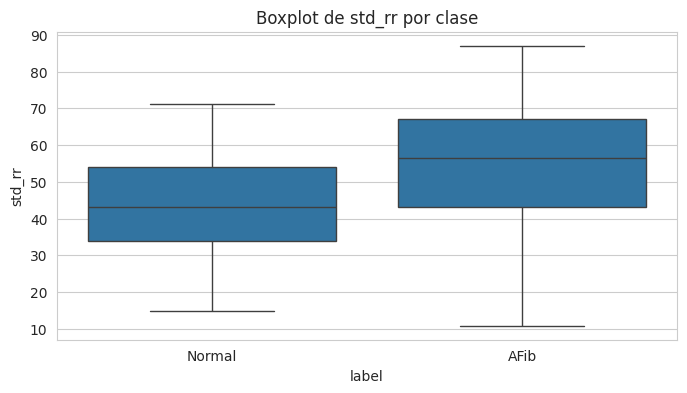

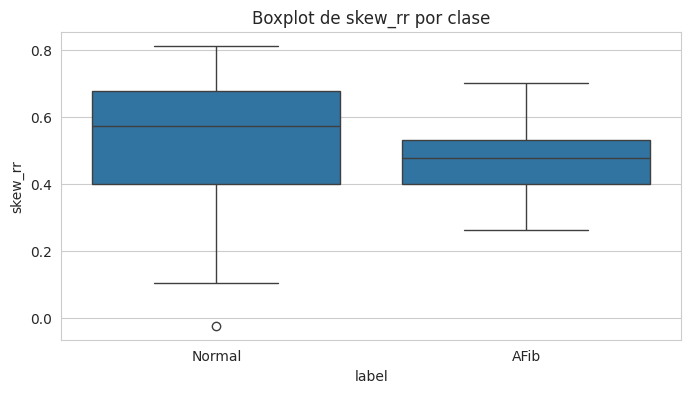

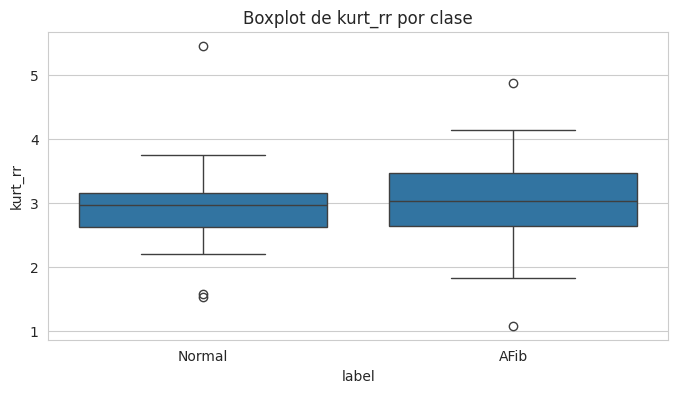

In [29]:
#Boxplot

for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='label', y=col)
    plt.title(f'Boxplot de {col} por clase')
    plt.show()

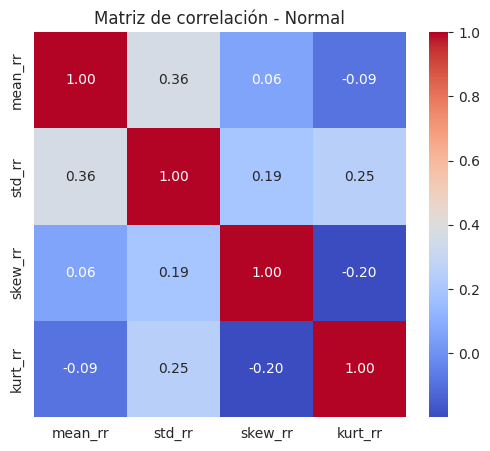

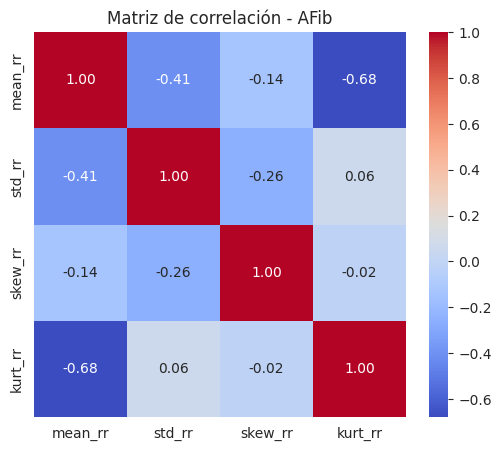

In [34]:
#Matriz de correlacion

corr = df[df['label'] == 'Normal'][features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación - Normal')
plt.show()

corr_afib = df[df['label'] == 'AFib'][features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_afib, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación - AFib')
plt.show()

In [35]:
#Pruebas estadísticas (t-test y Mann-Whitney)

resultados = []

for col in features:
  grupo1 = df[df['label']=='Normal'][col]
  grupo2 = df[df['label']=='AFib'][col]

  # Prueba t-test
  tstat, tpval = ttest_ind(grupo1, grupo2, equal_var=False)

  ustat, upval = mannwhitneyu(grupo1, grupo2, alternative='two-sided')

  resultados.append({
      'Variable': col,
      'T-statistic': tstat,
      'P-valor (t-test)': tpval,
      'U-statistic': ustat,
      'P-valor (Mann-Whitney)': upval
  })

  resultados_df = pd.DataFrame(resultados)

print(resultados_df)

  Variable  T-statistic  P-valor (t-test)  U-statistic  P-valor (Mann-Whitney)
0  mean_rr    -1.414657          0.169451         82.0                0.280364
1   std_rr    -1.243782          0.227456         76.0                0.182367
2  skew_rr     0.544559          0.590530        130.0                0.362734
3  kurt_rr    -0.279529          0.782608         99.0                0.718972


## 2. Resumen del artículo base (Clifford et al., 2017)

El artículo de Clifford et al. (2017) presenta el PhysioNet/Computing in Cardiology Challenge 2017, una competencia internacional cuyo objetivo principal es el desarrollo de algoritmos automáticos y precisos para la detección de fibrilación auricular (AFib) a partir de registros de electrocardiograma (ECG) de corta duración, adquiridos con dispositivos portátiles. Los autores describen la recopilación de una base de datos extensa y diversa, con señales etiquetadas por expertos en varias categorías: Ritmo Normal, AFib, otras arritmias y señales ruidosas. El desafío propone evaluar y comparar métodos de extracción de características y técnicas de clasificación para distinguir ritmos cardíacos, haciendo énfasis en la importancia de la calidad y representatividad de los datos.

**¿Qué variables parecen diferenciar más entre clases?**

A partir del análisis exploratorio realizado en el notebook:

- Las variables **std_rr** (desviación estándar) y **mean_rr** (media) muestran las diferencias más marcadas entre las clases Normal y AFib. En particular, la desviación estándar de los intervalos RR suele ser significativamente mayor en los casos de AFib, reflejando la alta variabilidad e irregularidad de este ritmo cardíaco.
- Las variables **skew_rr** y **kurt_rr** también presentan diferencias entre clases, pero estas diferencias son menos pronunciadas en comparación con las dos primeras. Sin embargo, pueden aportar información adicional sobre la forma de la distribución de los intervalos.

Las pruebas estadísticas y las visualizaciones (histogramas y boxplots) refuerzan estos hallazgos, mostrando que especialmente la dispersión de los intervalos es un rasgo clave para distinguir entre ritmos normales y episodios de fibrilación auricular.

**¿Qué aspectos del dataset llaman la atención?**

- El dataset está relativamente balanceado entre las dos clases principales, lo que es favorable para el entrenamiento y evaluación de modelos de clasificación.
- No se observan valores nulos ni inconsistencias en los tipos de datos, lo que facilita el procesamiento y el análisis.
- Las variables seleccionadas capturan tanto la tendencia central como la dispersión y la forma de la distribución de los intervalos cardíacos, alineándose con las recomendaciones del artículo base.
- La matriz de correlación sugiere que las variables aportan información complementaria, sin redundancias extremas.
- El dataset pone de manifiesto la importancia de la variabilidad del ritmo cardíaco (especialmente std_rr) como indicador de AFib, lo cual coincide con la literatura clínica y los enfoques propuestos en el desafío de PhysioNet.

En conclusión, el análisis confirma que el diseño del dataset y la selección de variables están bien fundamentados para el objetivo de clasificación, y que existen diferencias claras y medibles entre las clases, especialmente en lo que respecta a la variabilidad de los intervalos RR.

## 3. Análisis del dataset (cantidad de señales, duración, etiquetas, etc.)

El archivo `ecg_rr_features_curado.csv` contiene un resumen estadístico de intervalos RR extraídos de señales ECG, con el objetivo de facilitar la clasificación entre ritmos cardíacos normales y episodios de fibrilación auricular (AFib). A continuación, se presenta el análisis realizado en base a la exploración hecha en el notebook:

**Cantidad de señales y estructura general:**
- El dataset utilizado contiene 30 registros, cada uno representando un segmento de señal ECG procesado.
- Cada registro corresponde a una muestra resumida por sus características estadísticas principales.
- No se observan valores faltantes ni inconsistencias en los registros actuales.

- `mean_rr`: Media de los intervalos RR (en milisegundos), indicador del promedio de tiempo entre latidos.
- `std_rr`: Desviación estándar de los intervalos RR, que refleja la variabilidad (irregularidad) del ritmo cardíaco.
- `skew_rr`: Asimetría de los intervalos RR, que mide el sesgo de la distribución hacia valores altos o bajos.
- `kurt_rr`: Curtosis de los intervalos RR, que indica la presencia de valores extremos en la distribución.
- `label`: Clase asociada a cada segmento, “Normal” o “AFib”.